<a href="https://colab.research.google.com/github/ERugendo/insurance-data/blob/main/Copy_of_Insurance_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels

In [ ]:
from google.colab import files  ### Uploading file from desktop
uploaded = files.upload()
import io

Saving Insurance Data.csv to Insurance Data (3).csv


In [ ]:
df = pd.read_csv("Insurance Data.csv")

In [ ]:
df.head() ## show first 5 rows

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.tail() ### shows last 5 rows

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
df.dtypes ### data types

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:
df["age"].agg(["mean","min","max"])  ### finding the aggregate value of age

mean    39.207025
min     18.000000
max     64.000000
Name: age, dtype: float64

In [ ]:
df["charges"].agg(["mean","min","max"])

mean    13270.422265
min      1121.873900
max     63770.428010
Name: charges, dtype: float64

In [ ]:
df.isna()  #### finding missing values

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


There are no missing values in the dataset

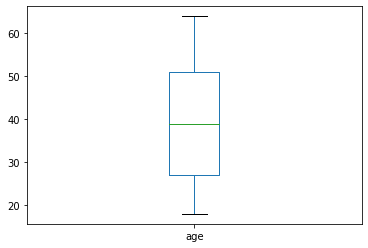

In [ ]:
df.age.plot.box()  ### getting outliers

*  Insights from the box plot indicate that the min age is just below 20 years and max age mid 60s. Median is just below 40 (39) and he range is between approx 27 years to approx 51 years.




In [ ]:
df.age.corr(df.charges)  ### finding the relationship between age and insurance charges

0.29900819333064754

*  From the figure above (correlation of 0.3) this shows that their is a positive relationship between age and charges.
*  The older the person the higher the charges




In [ ]:
df.sex.value_counts()  ### finding the gender intake of insurance

male      676
female    662
Name: sex, dtype: int64

In [ ]:
df.children.value_counts()  ### showing if the number of children in a household that has an insurance cover

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [ ]:
df.children.corr(df.charges)  ### finding the relationship between children and charges

0.0679982268479048

In [ ]:
df.smoker.value_counts()   ### finding the number of smokers vs non smokers

no     1064
yes     274
Name: smoker, dtype: int64

In [ ]:
df.bmi.corr(df.charges)

0.19834096883362895

*  The difference between male and female intake of insurance is not significant (1%). This means all genders are open to taking insurance.
*   Correlation between number of children and charges and bmi and charges is postive. This means, having a huge bmi and more children have a positive relation with the charges



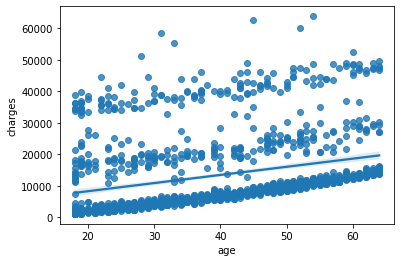

In [ ]:
sns.regplot(x='age', y='charges', data=df)  ### regression plot

 
*   From the seaborn regression plot, it seems there are 3 types of covers available to all age groups. The most common is where the premium(charges) are less than 1000.

*   Within each insurance option available, the lower the age, the lower the charges. This affirms the positive correlation between age and charges.

*   There are few (6) outliers in terms of charges that do not fall within the 3 options. This might be attributed to health condtions or increased benefits than what is embedded within the available options. 


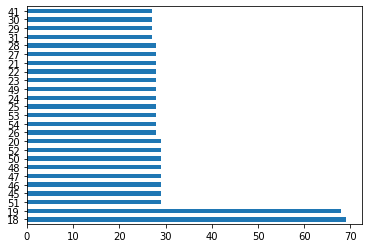

In [ ]:
df.age.value_counts()[:25].plot.barh()

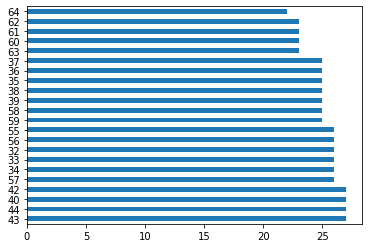

In [ ]:
df.age.value_counts()[25:].plot.barh()



*   From the graphs above, the lower the age, the more the people who have insurance policies. 

*   The number of people with insurance policy keeps decling with age. 

*   This can be attributed by the charges increasing with age hence becoming less affordable.
*   Ages 18 and 19 have the highest number of people with insurance covers.





In [ ]:
df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


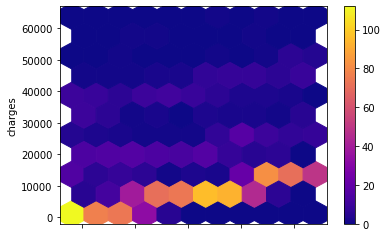

In [ ]:
df.plot.hexbin(x='age', y ='charges', gridsize=10, cmap="plasma")  ### density

**Summary**


*   From the analysis above, it's clear that insurance charges are positively correlated to age, children and BMI
*   The older the person, the higher the charges.  
*   Number of children affect the intake on insurance policies. Households with few children have a higher uptake on insurance policies. This might be attributed with more responsibilities in larger households.
*   Insurance cover is not gender biased. This information can be used by insurance sales people. They should can approach all genders for business.









In [ ]:
df.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64